<a href="https://colab.research.google.com/github/MemonML/datascience_bootcamp/blob/main/day10_multi_variate_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Multi-variate Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Importing Data Set

In [ ]:
# Load Dataset
data= pd.read_csv("/content/drive/MyDrive/Data Science Boot Camp/week2/day_9/data_sets/Advertising.csv")

# Looking into data set

In [ ]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
data.shape

(200, 5)

Exploratory Data Analysis

In [ ]:
a= data.describe() #returns a dataframe containing basis stats of data frame

In [ ]:
type(a)

pandas.core.frame.DataFrame

In [ ]:
a

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
b=a.get("TV")

In [ ]:
type(b)

pandas.core.series.Series

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
data.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [ ]:
data.isnull().any()

Unnamed: 0    False
TV            False
Radio         False
Newspaper     False
Sales         False
dtype: bool

In [ ]:
# Sns pair plot?
#help (sns.pairplot)

# Plotting the data

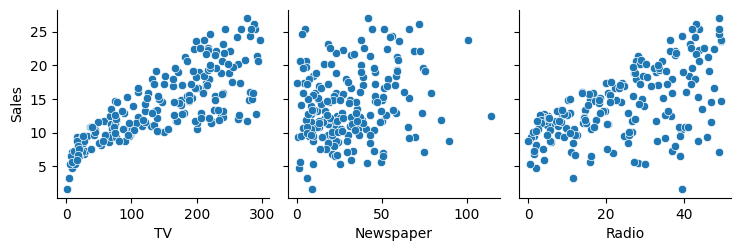

In [ ]:
# Scatter plots of each column (X) against sales (Y) using seaborn
sns.pairplot(data, x_vars=["TV", "Newspaper","Radio"], y_vars="Sales", kind="scatter")
plt.show()

# Ploting Heatmap

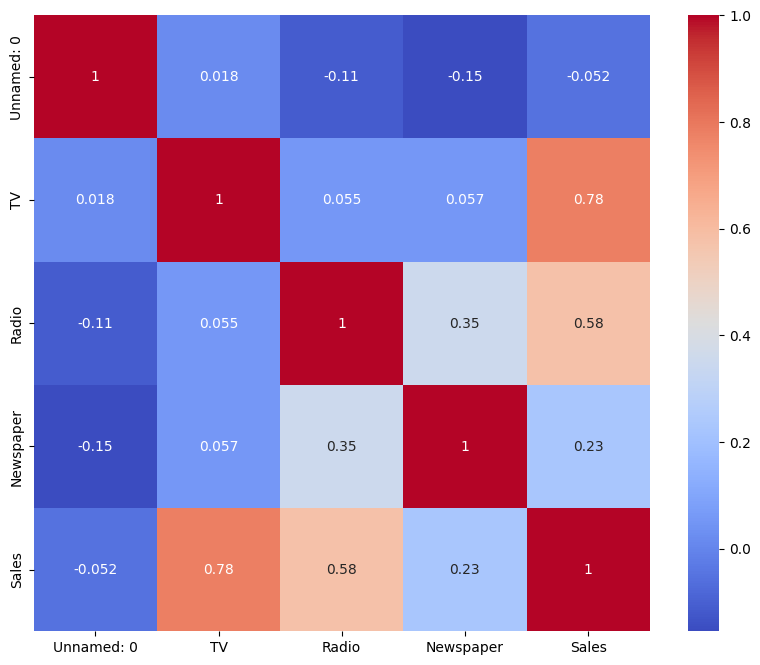

In [ ]:
# Corelation between differen columns
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", square=True)
#plt.title('Correlation Matric Heatmap)
plt.show()

# Data Splitting
Dataset preparation for the linear Regression modeling

In [ ]:
X= data[['TV', 'Newspaper']].values.reshape(-1,2)
Y= data['Sales']

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.3, random_state=100)

In [ ]:
X_train.shape

(140, 2)

#Dataset preparation for the multiple-linear regression modeling

In [ ]:
X=data[["TV", "Newspaper"]].values.reshape(-1,2)
Y=data["Sales"]

In [ ]:
X.shape

(200, 2)

In [ ]:
X_train, X_test, y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state=100)

# For 3D Visualization

Prepare Model data point for visualization

In [ ]:
x= X[:,0]
y= X[:,1]
z= Y

x_pred= np.linspace(data['TV'].min(), data['TV'].max(),30) # range of TC values
y_pred= np.linspace(data['Newspaper'].min(), data['Newspaper'].max(),30) # range of Radio values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz= np.array([xx_pred.flatten(), yy_pred.flatten()]).T

Model: Training

In [ ]:
mod= LinearRegression()
model=mod.fit(X,Y)


In [ ]:
predicted=model.predict(model_viz)
predicted.shape

In [ ]:
test_pred = model.predict([[20, 30]])
test_pred

array([8.03955497])

# Predication on Testing Data

In [ ]:
# Make predication on the test set
y_pred = model.predict([[20,30]])

In [ ]:
print(y_pred)

[8.03955497]


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 8.3782803 , 17.18118007, 14.14566366, 18.59428826, 18.13686201,
       16.33197583, 13.4356142 , 15.30352244, 17.67545985, 17.14589948,
       11.51055513, 19.81985784,  9.72411309, 15.00308047, 11.01001691,
       10.55121965, 13.06137623, 15.31405831, 13.77052018, 12.77696479,
       16.02151629, 13.22803302, 17.2786527 , 15.78775455, 15.41980975,
       16.24878755, 18.07813081, 10.74374066, 14.52215544, 12.09680826,
       10.5572025 ,  9.05092921, 13.60348081, 15.74315393,  8.93364607,
       12.05446007, 11.66032869, 14.23912102, 16.7850524 , 17.74147866,
       18.42450828, 14.12161787, 15.58619836, 17.23447543, 11.9254192 ,
       11.5606203 , 10.52079501, 18.4565948 , 10.89032618,  8.17680239,
       16.66977759, 15.4761982 , 11.62759279, 13.20163847, 16.06827438,
        9.85634802,  7.97898265,  7.38685969, 15.67054366, 11.97439961])

# Evaluation

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error = {round(mse, 2)}')
print(f'R^2 = {round(r2, 2)}')

Mean Squared Error = 8.04
R^2 = 0.59


# Plotting the 3d plot - Regression Plane

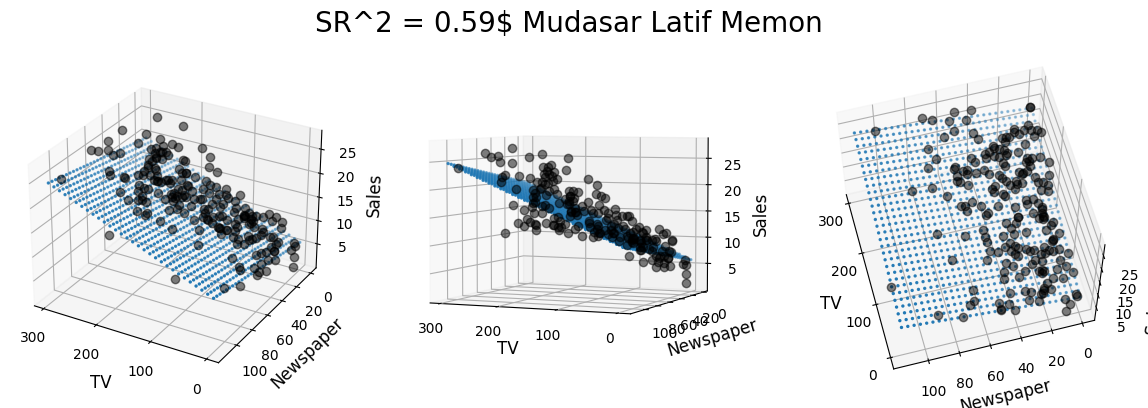

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("default")

fig= plt.figure(figsize=(12,4))

ax1= fig.add_subplot(131, projection="3d")
ax2= fig.add_subplot(132, projection="3d")
ax3= fig.add_subplot(133, projection="3d")

axes = [ax1, ax2, ax3]

for ax in axes:
  ax.plot(x,y,z, color="k", zorder=15, linestyle="none", marker="o", alpha=0.5)
  ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, s=2)
  ax.set_xlabel("TV", fontsize=12)
  ax.set_ylabel("Newspaper", fontsize=12)
  ax.set_zlabel("Sales", fontsize=12)
  ax.locator_params(nbins=4, axis="x")
  ax.locator_params(nbins=5, axis="x")

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle("SR^2 = %.2f$ Mudasar Latif Memon" %r2, fontsize=20)
fig.tight_layout()